# Projet Competition Titanic

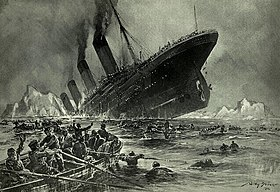

## Présentation du projet : 

### Introduction
Le projet de Prédiction de Survie à Bord du Titanic vise à utiliser des techniques d'apprentissage automatique pour déterminer si un passager aurait survécu ou non au tragique naufrage du RMS Titanic en 1912. Ce projet se base sur des données historiques des passagers, notamment leur âge, leur sexe, leur classe de cabine, etc. L'objectif est de créer un modèle de machine learning capable de prédire la survie des passagers en fonction de ces caractéristiques.

### Étapes du Projet
Le projet se décompose en plusieurs étapes clés :

1. Analyse Exploratoire des Données (EDA)
Dans cette première étape, nous explorerons en détail le jeu de données du Titanic. Cela implique la visualisation des données, la recherche de valeurs manquantes, l'analyse de la distribution des caractéristiques, et la recherche de corrélations potentielles entre les variables. L'EDA nous aidera à mieux comprendre nos données et à prendre des décisions éclairées lors de l'étape suivante.

2. Feature Engineering
Le Feature Engineering consiste à créer de nouvelles variables ou à transformer les caractéristiques existantes pour améliorer la performance du modèle de prédiction. Nous pourrions, par exemple, extraire des informations à partir du nom des passagers, gérer les valeurs manquantes, encoder les variables catégorielles, et normaliser les données. Cette étape est cruciale pour optimiser notre modèle.

3. Modélisation
La modélisation est l'étape où nous construisons et évaluons différents modèles de machine learning pour prédire la survie des passagers. Nous utiliserons probablement des algorithmes tels que la régression logistique, les arbres de décision, les forêts aléatoires, ou les réseaux de neurones, selon la complexité du problème. Nous diviserons nos données en ensembles d'entraînement et de test, et nous évaluerons la performance de chaque modèle.

### Kaggle et GitHub
Ce projet est également mené sur Kaggle, une plateforme de compétitions de data science. Nous y partageons notre travail, nos résultats, et nous pouvons même participer à des compétitions pour comparer notre modèle avec d'autres participants du monde entier. Le projet est mené en anglais sur Kaggle pour favoriser la collaboration et l'apprentissage au sein de la communauté internationale de data scientists.

Nous utilisons GitHub pour héberger notre projet, collaborer efficacement, et assurer un suivi transparent de nos travaux. Cela facilite également la mise en place ultérieure d'un Dashboard interactif à l'aide de Streamlit pour visualiser nos résultats de manière conviviale.


# Sommaire

## I. Importation
### 1. Importation des librairies
### 2. Importation des données

## II. Exploration des données
### 1. Analyse des variables
#### A. Analyse Survived
#### B. Analyse des variables
### 2. Analyse statistiques

## III. Feature Engineering
### 1. Labelisation
### 2. Imputation
### 3. Transformation des variables
### 4. Suppression des colonnes


## III. Modélisation
### 1. Préparation des données
### 2. Entrainement des modèles
#### A. Régression Logistique
#### B. SVC
#### C. Random Forest
#### D. XGBoost

# 

## I. Importation
### 1. Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import missingno as msno


# Feature Engineering
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Modélisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

### 2. Importation des données

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Vérification train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Vérification test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Nous avons procédé à l'importation des différentes librairies mais également les jeux de données qui vont nous sert pour notre étude.
A présent, nous allons procéder à leur exploration.

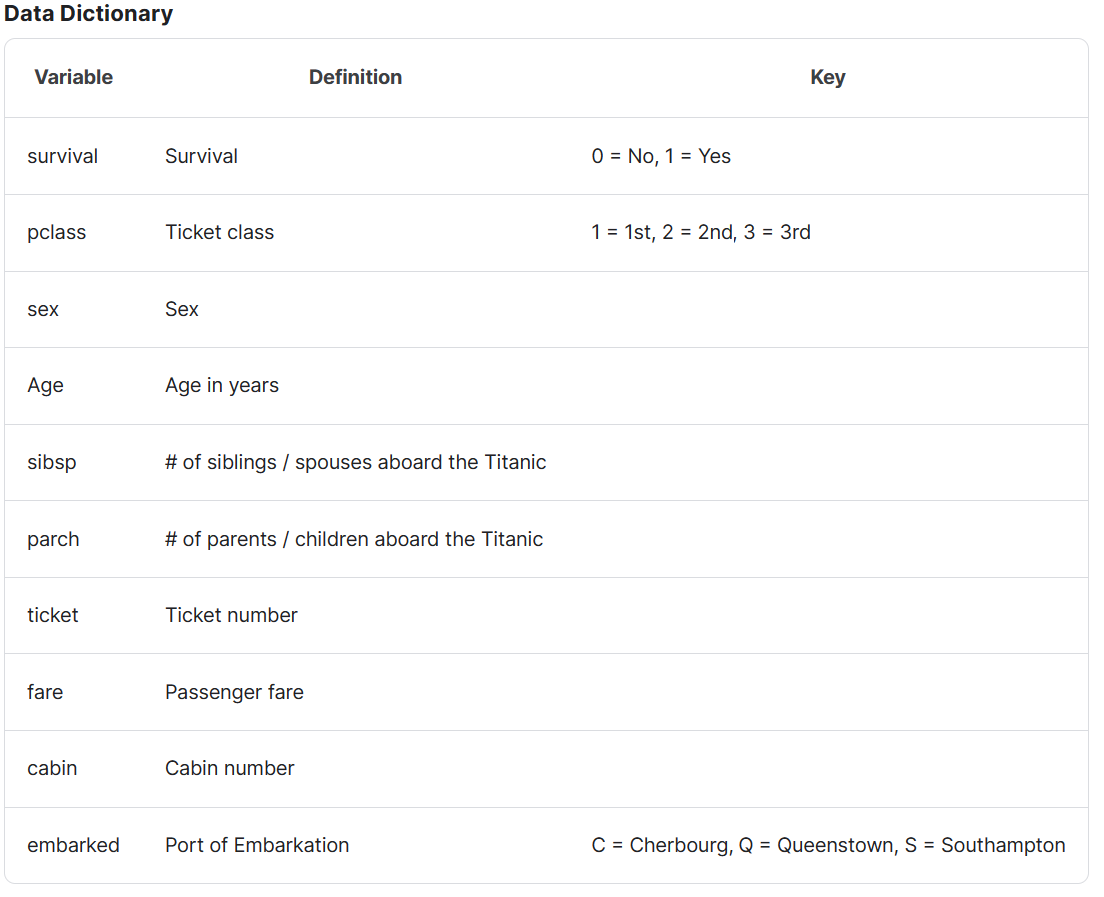

## II. Exploration des données

### 1. Analyse des variables

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


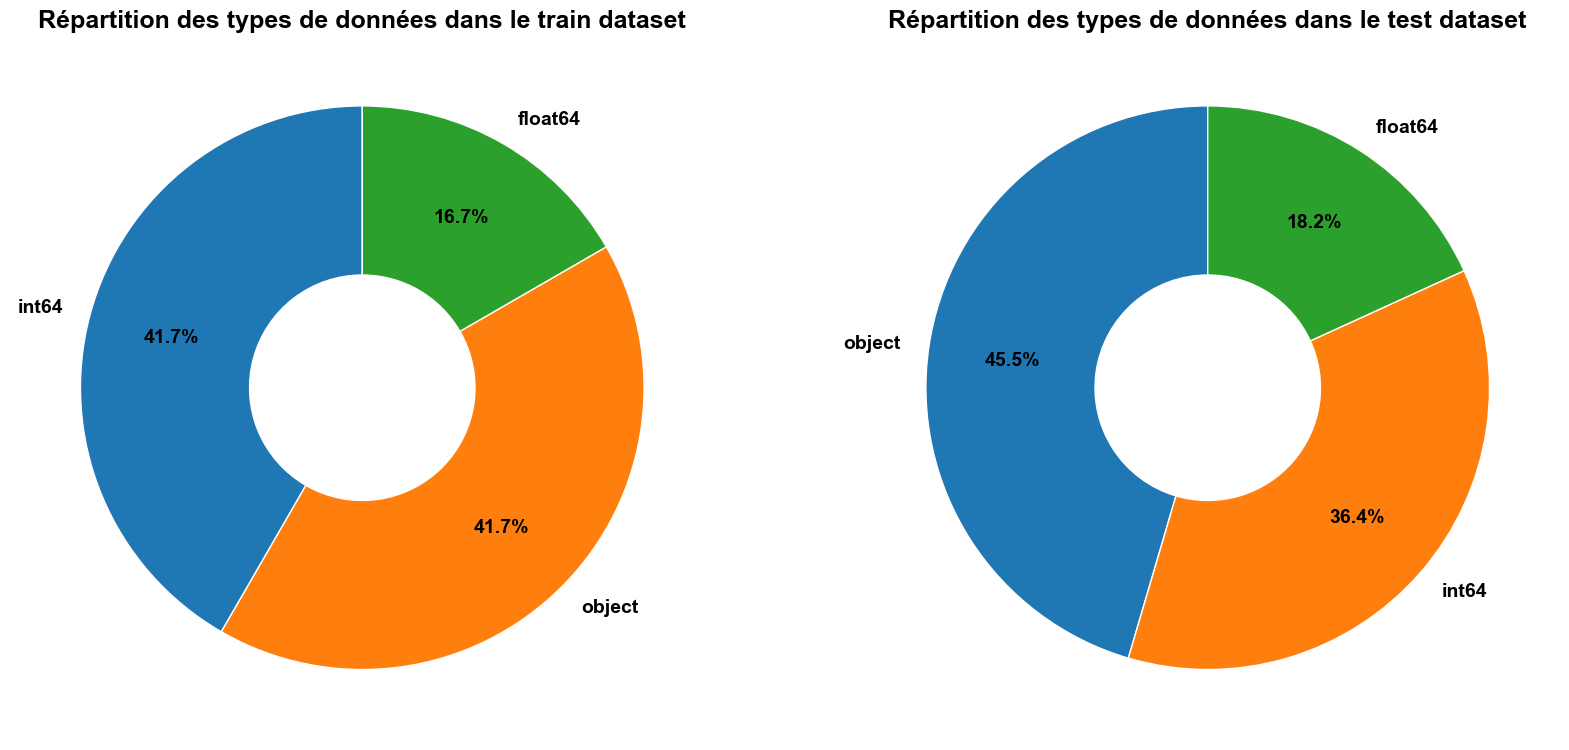

In [7]:
# Répartition de la catégorie des variables

# Analyse nature des variables


# Définition du titre
title = {"family": "Arial",
         "color":  "black",
         "weight": "bold",
         "size": 18}

# Configuration du style Seaborn
sns.set_style("whitegrid")

# Définition des couleurs pour chaque type de données
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Création d'une figure avec deux sous-figures
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Premier sous-plot : train dataset
train.dtypes.value_counts().plot(kind="pie",
                                 autopct="%1.1f%%",
                                 colors=colors,
                                 wedgeprops=dict(width=0.6, edgecolor='w'),
                                 textprops=dict(color='black', size=14, weight='bold'),
                                 startangle=90,
                                 pctdistance=0.7,
                                 labeldistance=1.1,
                                 ax=ax1)
ax1.set_title("Répartition des types de données dans le train dataset", fontdict=title)
ax1.legend().remove()

# Second sous-plot : test dataset
test.dtypes.value_counts().plot(kind="pie",
                                 autopct="%1.1f%%",
                                 colors=colors,
                                 wedgeprops=dict(width=0.6, edgecolor='w'),
                                 textprops=dict(color='black', size=14, weight='bold'),
                                 startangle=90,
                                 pctdistance=0.7,
                                 labeldistance=1.1,
                                 ax=ax2)
ax2.set_title("Répartition des types de données dans le test dataset", fontdict=title)
ax2.legend().remove()

# Affichage de la figure
plt.show()


In [8]:
# Vérification information train et test

print('Information Train')
print(train.info())

print('-----------------------------------------')

print('Information Test')
print(test.info())

Information Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------------------------------
Information Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    

Dans cette première analyse, nous pouvons déjà émettre quelques informations :

- Les variables objets semblent essentielles pour notre projet sauf Cabin,
- Cette variable indique le numéro de cabine, nous avons déjà la classe et la forte présence de valeurs manquantes nous donnent la tendance de supprimer cette variable,
- nos variables présentent une faible présence de valeurs manquantes (voir graphique ci-dessous). Hormis Age, nous traiterons cette notion dans notre étape du Feature Engineering,
- les analyses statistiques démontrent une homogénéité importante entre les données du train et du test,
- les variables 'Name' et 'Ticket' ne présentent aucun intérêt dans notre projet actuel (ces données peuvent être utiles mais pas dans notre situation) : nous allons les supprimer lors du traitement des variables.

#### A. Analyse Survived

Survived- train
0    549
1    342
Name: Survived, dtype: int64


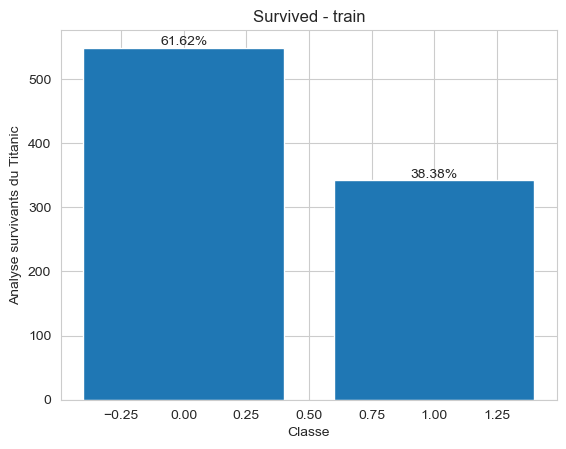

In [9]:
print('Survived- train')
print(train['Survived'].value_counts())

# Données d'entraînement
train_survived_counts = train['Survived'].value_counts()
plt.bar(train_survived_counts.index, train_survived_counts.values)
plt.title('Survived - train')
plt.xlabel('Classe')
plt.ylabel('Analyse survivants du Titanic')

# Ajouter les pourcentages au-dessus des barres
total_passengers = len(train['Survived'])
for i, count in enumerate(train_survived_counts):
    percentage = (count / total_passengers) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

Notre jeu de données indique qu'une plus forte proportion de passagers n'a pas survécu au Naufrage du Titanic.

A présent, nous allons étudier dans le cadre d'une analyse bivariée, le rôle des différentes variables en fonction de la variable Survived.

##### Analyse Bivariée

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


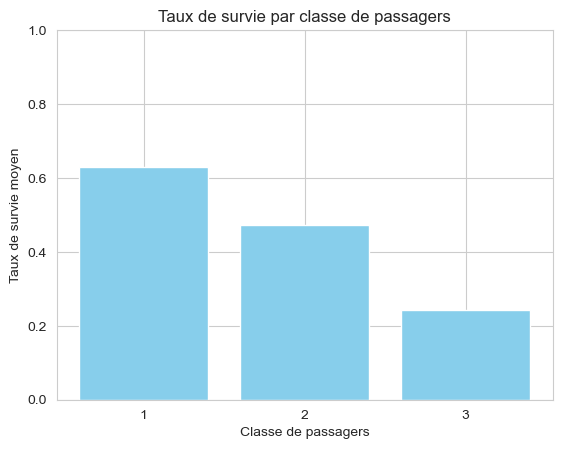

In [10]:
# Analyse Pclass en fonction de Survived

print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

# Données
data = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Création du graphique à barres
plt.bar(data['Pclass'], data['Survived'], color='skyblue')
plt.xlabel('Classe de passagers')
plt.ylabel('Taux de survie moyen')
plt.title('Taux de survie par classe de passagers')
plt.xticks(data['Pclass'])
plt.ylim(0, 1)  # Limite de l'axe y entre 0 et 1 pour le taux de survie

# Affichage du graphique
plt.show()

Dans cette analyse, nous constatons que la probabilité de survivre est plus élevée pour les passagers de la 1ère classe (environ 63% de survivants) que les autres passagers (47% pour la 2nd classe et 24% pour la 3ème classe).

      Sex  Survived
0  female  0.742038
1    male  0.188908


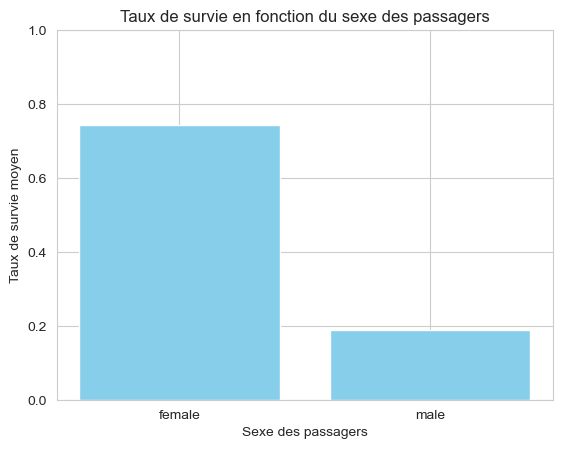

In [11]:
# Analyse Sex en fonction de Survived

print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

# Données
data = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Création du graphique à barres
plt.bar(data['Sex'], data['Survived'], color='skyblue')
plt.xlabel('Sexe des passagers')
plt.ylabel('Taux de survie moyen')
plt.title('Taux de survie en fonction du sexe des passagers')
plt.xticks(data['Sex'])
plt.ylim(0, 1)  # Limite de l'axe y entre 0 et 1 pour le taux de survie

# Affichage du graphique
plt.show()

Dans cette seconde analyse, nous remarquons que les femmes ont une très forte probabilité de survivre, près de 3/4 ont survécu.
Les hommes ont une très faible probabilité de survivre avec moins d'1/5 (18,89%).

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


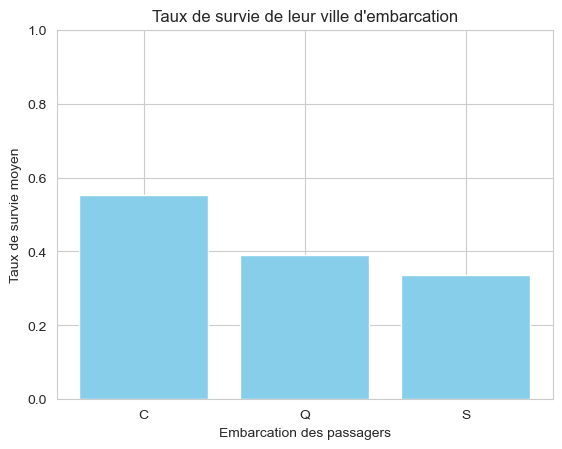

In [12]:
# Analyse Pclass en fonction de Survived

print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

# Données
data = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Création du graphique à barres
plt.bar(data['Embarked'], data['Survived'], color='skyblue')
plt.xlabel('Embarcation des passagers')
plt.ylabel('Taux de survie moyen')
plt.title("Taux de survie de leur ville d'embarcation")
plt.xticks(data['Embarked'])
plt.ylim(0, 1)  # Limite de l'axe y entre 0 et 1 pour le taux de survie

# Affichage du graphique
plt.show()

In [13]:
# Analyse avec regroupement sur 3 tranches d'âges

train['AgeBand'] = pd.cut(train['Age'], 3)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 26.947]",0.407524
1,"(26.947, 53.473]",0.417391
2,"(53.473, 80.0]",0.320000


In [14]:
# Analyse avec regroupement sur 4 tranches d'âges

train['AgeBand'] = pd.cut(train['Age'], 4)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.397403
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [15]:
# Analyse avec regroupement sur 5 tranches d'âges

train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [16]:
# Analyse avec regroupement sur 5 tranches d'âges

train['AgeBand'] = pd.cut(train['Age'], 6)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


En effectuant un travail d'analyse par tranches d'âges, nous pouvons constater que plus l'âge du passager est élevé et davantage son taux de survie va diminuer.

Dans notre étape du Feature Engineering, nous allons travaille sur les tranches suivantes :
   - inférieur ou égal à 16 ans
   - supérieur à 16 et inférieur à 40
   - supérieur à 40 et inférieur à 60
   - supérieur à 60.
    
En effet, un traitement par tranche au lieu des âges de manière simpliste va simplifier le travail de la modélisation.

Il semble que la ville d'embarcation a un impact sur le taux de survie. En effet, la ville de Cherbourg a davantage de survivants que les autres villes.
Nous allons étudier le sexe et la classe des passagers selon leur zone d'embarquement.

Ainsi, cette analyse a permis de mettre en place les informations suivantes :
- la probabilité de survivre à ce naufrage est plus élevé pour les femmes et les passagers de la 1ère classe tandis que les hommes et les passagers de la 3ème classe ont une très faible probabilité de survivre.
- Les villes d'embarquement semblent avoir un léger impact sur la probabilité de survivre.

Toutefois, il serait interessant d'avoir une connaissance des passagers de 1ère, 2nd et 3ème en fonction du port mais également le sexe des passagers selon la classe et le quai d'embarquement.

Toutefois, notre objectif est d'avoir une connaissance plus approfondie de notre jeu de données et pour nos variables.

# 

### B. Analyse variables

######  Analyse Pclass


Pclass - train
3    491
1    216
2    184
Name: Pclass, dtype: int64
-----------------------------------------
Pclass - test
3    218
1    107
2     93
Name: Pclass, dtype: int64


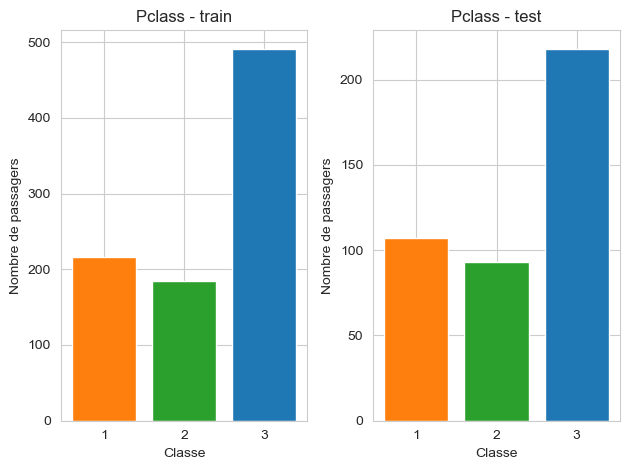

In [17]:
print('Pclass - train')
print(train['Pclass'].value_counts())

print('-----------------------------------------')

print('Pclass - test')
print(test['Pclass'].value_counts())

## Représentetion graphique ##


# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_pclass_counts = train['Pclass'].value_counts()
plt.subplot(1, 2, 1)
plt.bar(train_pclass_counts.index, train_pclass_counts.values, color=colors)
plt.title('Pclass - train')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')

# Données de test
test_pclass_counts = test['Pclass'].value_counts()
plt.subplot(1, 2, 2)
plt.bar(test_pclass_counts.index, test_pclass_counts.values, color=colors)
plt.title('Pclass - test')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()


      

Dans cette variable, il est intéressant de connaître la classe pour les passagers. Nous pouvons constater que plus de la moitié des passagers sont en 3ème classe (ceci étant lié à un coût certainement plus faible).
Cette donnée est essentielle pour notre travail, nous allons la conserver.

###### B. Sex

Sex - train
male      577
female    314
Name: Sex, dtype: int64
-----------------------------------------
Sex - test
male      266
female    152
Name: Sex, dtype: int64


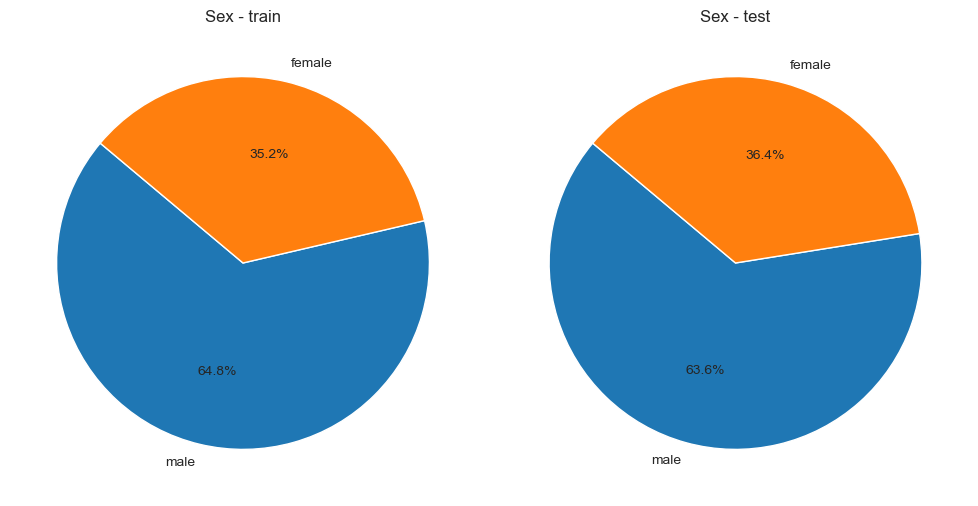

In [18]:
print('Sex - train')
print(train['Sex'].value_counts())

print('-----------------------------------------')

print('Sex - test')
print(test['Sex'].value_counts())

## Représentetion graphique ##


# Données d'entraînement
train_sex_counts = train['Sex'].value_counts()
labels = train_sex_counts.index
sizes = train_sex_counts.values

# Crée un diagramme circulaire avec les pourcentages
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sex - train')

# Données de test
test_sex_counts = test['Sex'].value_counts()
labels = test_sex_counts.index
sizes = test_sex_counts.values

# Crée un diagramme circulaire avec les pourcentages
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sex - test')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

Cette seconde variable nous indique un proportion identique d'hommes et de femmes dans les 2 fichiers.
Nous constatons une plus forte présence d'hommes sur le Titanic que de femmes.

Cette variable est pertinente pour la suite de notre projet, nous allons la conserver mais il faut procéder à une labelisation.

###### Age

Age - train
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
-----------------------------------------
Age - test
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64


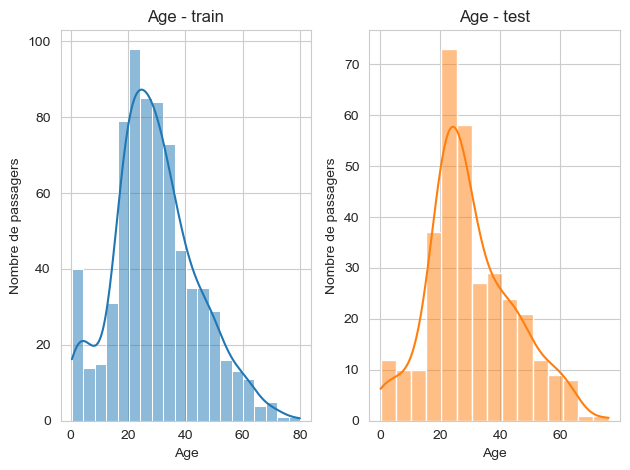

In [19]:
print('Age - train')
print(train['Age'].value_counts())

print('-----------------------------------------')

print('Age - test')
print(test['Age'].value_counts())

## Représentetion graphique ##


# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_pclass_counts = train['Age'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 1)
sns.histplot(train_pclass_counts, color=colors[0], kde=True)
plt.title('Age - train')
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')

# Données de test
test_pclass_counts = test['Age'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 2)
sns.histplot(test_pclass_counts, color=colors[1], kde=True)
plt.title('Age - test')
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

Dans cette analyse, nous pouvons constater que nous avons 3 grandes catégories qui ressortent : 
- les moins de 20 ans
- les 21-40 ans,
- supérieurs à 40 ans.

Dans notre étape du feature engineering, nous allons procéder à un regroupement de ces âges en 3 catégories.
Ensuite, il sera possible de procéder à un traitement des valeurs manquantes pour cette variable avec une plus grande pertinence.

###### SibSP

Age - train
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
-----------------------------------------
Age - test
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64


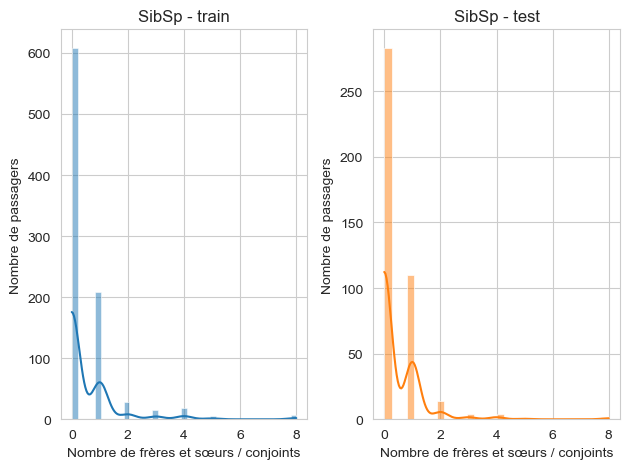

In [20]:
print('Age - train')
print(train['Age'].value_counts())

print('-----------------------------------------')

print('Age - test')
print(test['Age'].value_counts())


# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_sibsp_counts = train['SibSp']
plt.subplot(1, 2, 1)
sns.histplot(train_sibsp_counts, color=colors[0], kde=True)
plt.title('SibSp - train')
plt.xlabel('Nombre de frères et sœurs / conjoints')
plt.ylabel('Nombre de passagers')

# Données de test
test_sibsp_counts = test['SibSp']
plt.subplot(1, 2, 2)
sns.histplot(test_sibsp_counts, color=colors[1], kde=True)
plt.title('SibSp - test')
plt.xlabel('Nombre de frères et sœurs / conjoints')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

Cette variable nous indique le nombre de frères/soeurs mais également de conjoints.


###### Parch

Parch - train
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
-----------------------------------------
Parch - test
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


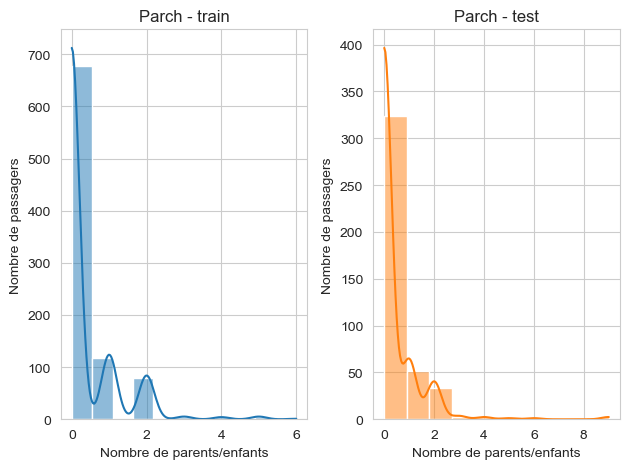

In [21]:
print('Parch - train')
print(train['Parch'].value_counts())

print('-----------------------------------------')

print('Parch - test')
print(test['Parch'].value_counts())

# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_parch_counts = train['Parch']
plt.subplot(1, 2, 1)
sns.histplot(train_parch_counts, color=colors[0], kde=True)
plt.title('Parch - train')
plt.xlabel('Nombre de parents/enfants')
plt.ylabel('Nombre de passagers')

# Données de test
test_parch_counts = test['Parch']
plt.subplot(1, 2, 2)
sns.histplot(test_parch_counts, color=colors[1], kde=True)
plt.title('Parch - test')
plt.xlabel('Nombre de parents/enfants')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

Cette variable est très similaire à notre précédente analyse.

###### Fare

Fare - train
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
-----------------------------------------
Fare - test
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64


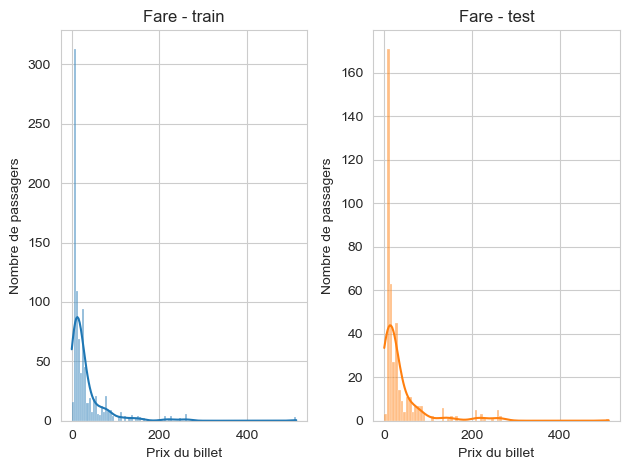

In [22]:
print('Fare - train')
print(train['Fare'].value_counts())

print('-----------------------------------------')

print('Fare - test')
print(test['Fare'].value_counts())

# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_fare = train['Fare'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 1)
sns.histplot(train_fare, color=colors[0], kde=True)
plt.title('Fare - train')
plt.xlabel('Prix du billet')
plt.ylabel('Nombre de passagers')

# Données de test
test_fare = test['Fare'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 2)
sns.histplot(test_fare, color=colors[1], kde=True)
plt.title('Fare - test')
plt.xlabel('Prix du billet')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

In [23]:
# Analyse avec regroupement sur 3 tranches d'âges

train['FareBand'] = pd.cut(train['Fare'], 3)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 170.776]",0.376579
1,"(170.776, 341.553]",0.647059
2,"(341.553, 512.329]",1.000000


In [24]:
# Analyse avec regroupement sur 4 tranches d'âges

train['FareBand'] = pd.cut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


Comme nous avons pu le constater lors de l'analyse de la variable Pclass, il existe bien un rapport entre la classe et le prix des billets.
La très forte majorité des billets a une valeur inférieur à 100$ et seul les clients les plus fortunés ont déboursé un montant plus élevé (1ère classe).

De plus, cela confirme bien notre hypothèse qu'il existe un lien entre le prix du billet et le taux de survie. Les personnes avec un billet plus onéreux ont une très forte probabilité voir la certitude de survivre.

NB : le montant du dollar en 1912 est différent d'aujourd'hui.

###### Embarked

Embarked - train
S    644
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------------
Embarked - test
S    270
C    102
Q     46
Name: Embarked, dtype: int64


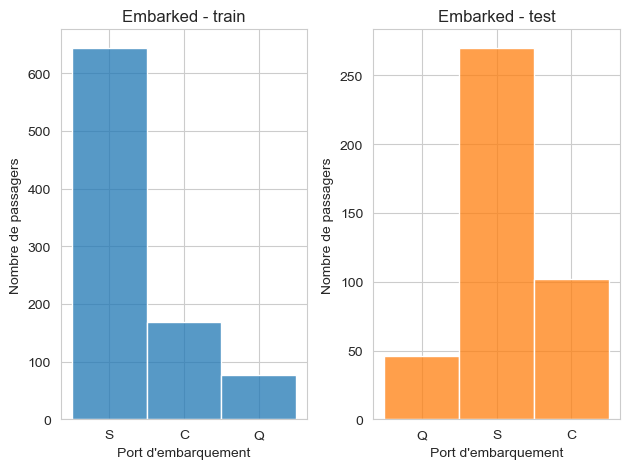

In [25]:
print('Embarked - train')
print(train['Embarked'].value_counts())

print('-----------------------------------------')

print('Embarked - test')
print(test['Embarked'].value_counts())

# Couleurs pour les barres
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Données d'entraînement
train_embarked_counts = train['Embarked'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 1)
sns.histplot(train_embarked_counts, color=colors[0])
plt.title('Embarked - train')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')

# Données de test
test_embarked_counts = test['Embarked'].dropna()  # Supprimez les valeurs NaN
plt.subplot(1, 2, 2)
sns.histplot(test_embarked_counts, color=colors[1])
plt.title('Embarked - test')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')

# Ajustez la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche les graphiques
plt.show()

Cette variable ne semble pas apporter une valeur essentielle à la modélisation. De plus, nous constatons un fort écart dans les données.
Nous n'allons pas conserver cette dernière pour notre phase de modélisation.

### 2. Analyse statistiques

###### A. Analyse statistiques et distribution

1. Moyenne : la moyenne est un outil de calcul permettant de résumer une liste de valeurs numériques en un seul nombre réel, indépendamment de l’ordre dans lequel la liste est donnée. Par défaut, il s’agit de la moyenne arithmétique, qui se calcule comme la somme des termes de la liste, divisée par le nombre de termes1. D’autres moyennes peuvent être plus adaptées selon les contextes.



2. Variance : La variance d'une variable aléatoire est la mesure de la dispersion des échantillons autour de la moyenne, autrement dit, elle caractérise sa capacité à prendre des valeurs plus ou moins éloignées de son espérance.



3. Ecart type : c’est la racine carrée de la variance.



4. : Skewness : Skewness : C’est une mesure d’asymétrie :
-	Si Y1 = 0 : distribution symétrique,
-	Si Y1 > 0 : distribution étalée à droite,
-	Si Y1 < 0 : distribution étalée à gauche.


5. : Kurtozys : c’est une mesure d’aplatissement, on peut s’interpréter si distribution symétrique :
-	Si Y2 = 0 : la distribution a le même aplatissement que la loi normale,
-	Si Y2 > 0 : moins aplatie, observation plus concentrée,
-	Si Y2 < 0 : plus aplatie.


###### Train

***** PassengerId *****
Moyenne: 446.0
Variance: 66231.0
Écart-type: 257.3538420152301
Skewness: 0.0
Kurtosis: -1.1999999999999997


<Figure size 800x400 with 0 Axes>

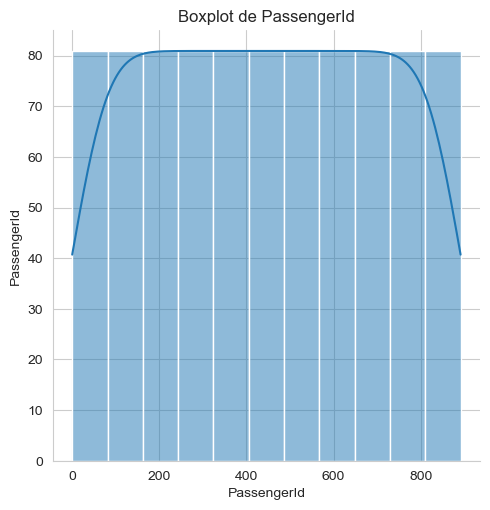

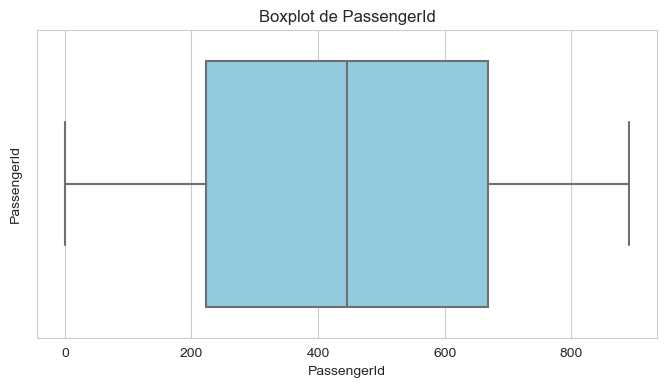



***** Survived *****
Moyenne: 0.3838383838383838
Variance: 0.2367722165474984
Écart-type: 0.4865924542648585
Skewness: 0.4785234382949897
Kurtosis: -1.775004671066304


<Figure size 800x400 with 0 Axes>

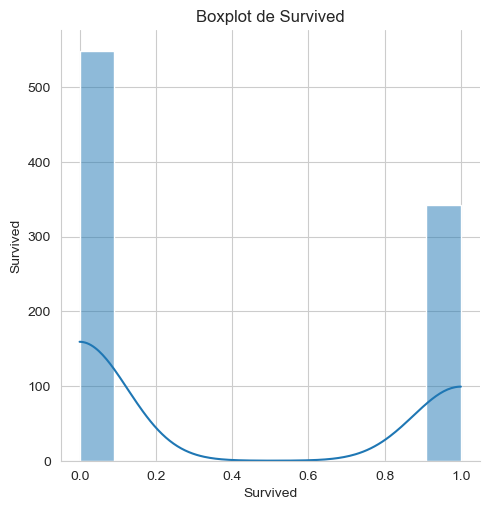

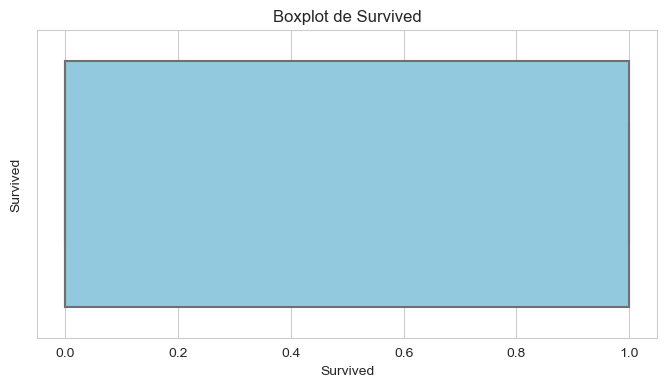



***** Pclass *****
Moyenne: 2.308641975308642
Variance: 0.6990151199889065
Écart-type: 0.8360712409770513
Skewness: -0.6305479068752845
Kurtosis: -1.2800149715782825


<Figure size 800x400 with 0 Axes>

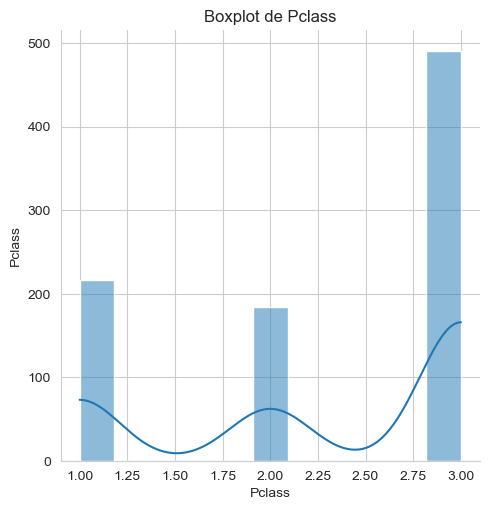

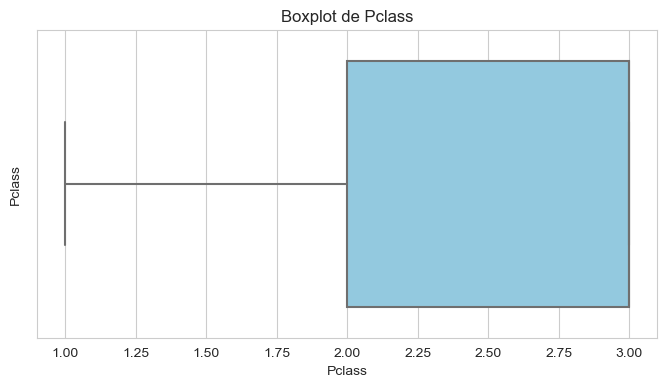



***** Age *****
Moyenne: 29.69911764705882
Variance: 211.0191247463081
Écart-type: 14.526497332334044
Skewness: 0.38910778230082704
Kurtosis: 0.17827415364210353


<Figure size 800x400 with 0 Axes>

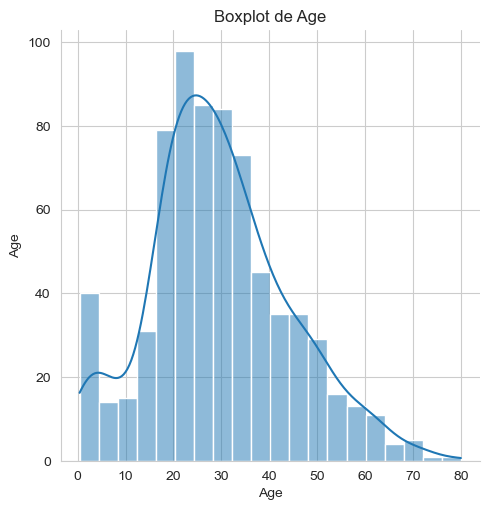

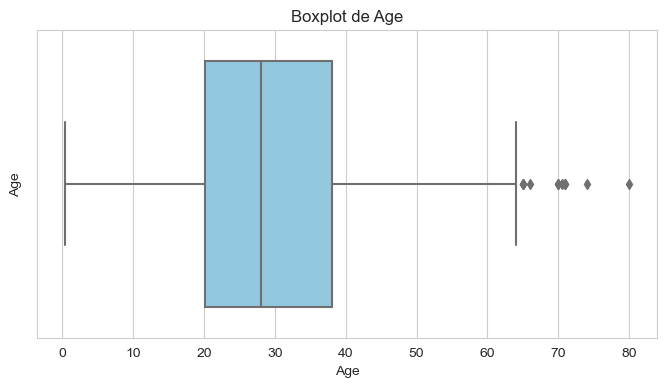



***** SibSp *****
Moyenne: 0.5230078563411896
Variance: 1.2160430774662894
Écart-type: 1.1027434322934275
Skewness: 3.6953517271630565
Kurtosis: 17.880419726645968


<Figure size 800x400 with 0 Axes>

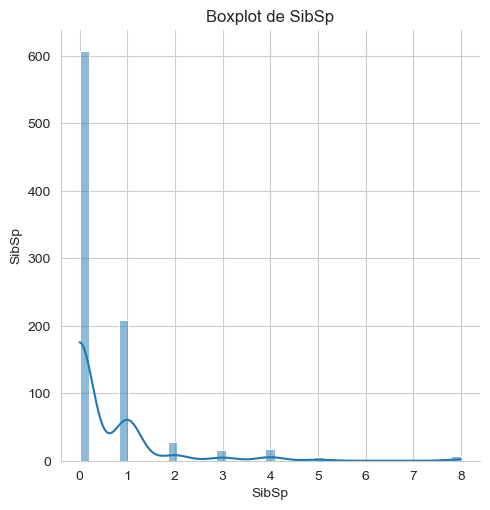

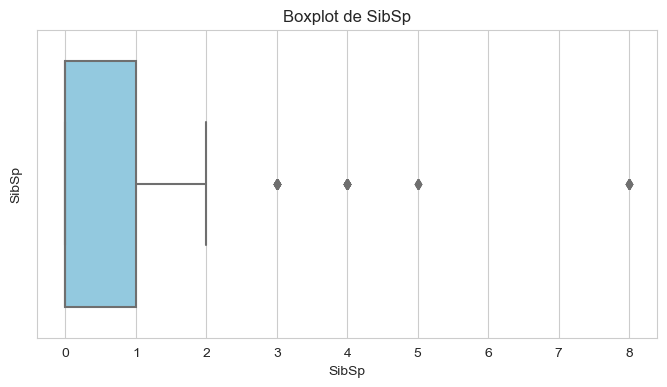



***** Parch *****
Moyenne: 0.38159371492704824
Variance: 0.6497282437357467
Écart-type: 0.8060572211299559
Skewness: 2.7491170471010933
Kurtosis: 9.778125179021648


<Figure size 800x400 with 0 Axes>

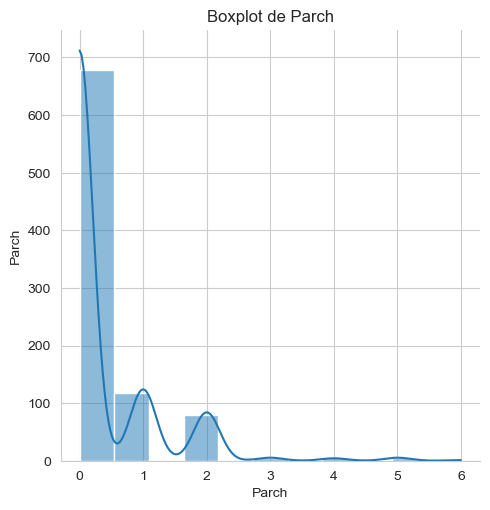

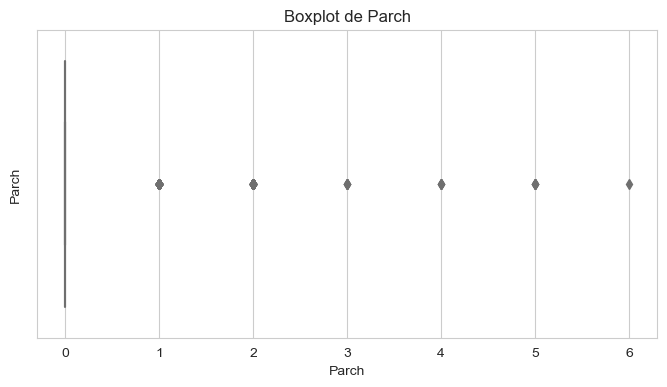



***** Fare *****
Moyenne: 32.204207968574636
Variance: 2469.436845743117
Écart-type: 49.693428597180905
Skewness: 4.787316519674893
Kurtosis: 33.39814088089868


<Figure size 800x400 with 0 Axes>

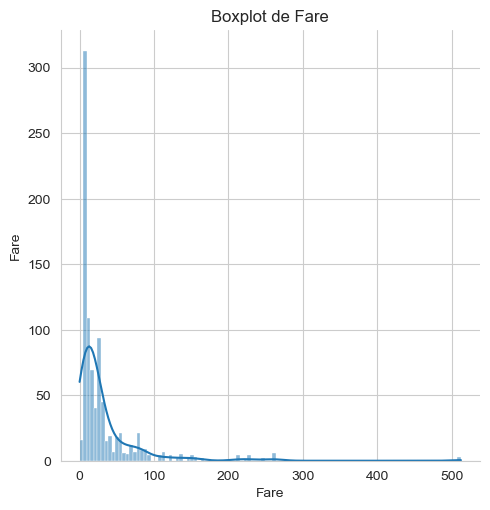

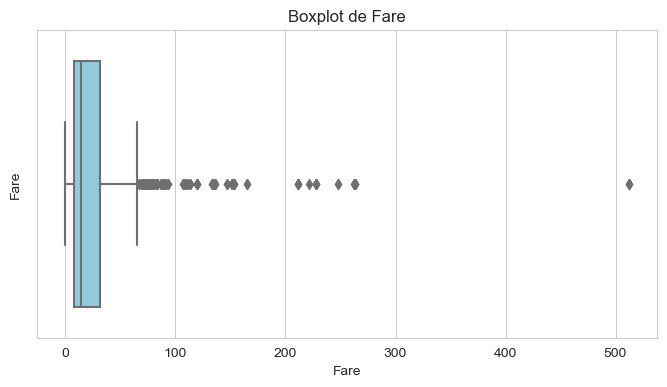

In [26]:
# Sélectionnez les colonnes numériques
numeric_columns = train.select_dtypes(['float64', 'int64'])

# Boucle à travers chaque colonne numérique
for col in numeric_columns.columns:
    # Statistiques de base
    print(f'***** {col} *****')
    print('Moyenne:', numeric_columns[col].mean())
    print('Variance:', numeric_columns[col].var())
    print('Écart-type:', numeric_columns[col].std())
    print('Skewness:', numeric_columns[col].skew())
    print('Kurtosis:', numeric_columns[col].kurtosis())
    
    # Graphique de distribution
    plt.figure(figsize = (8,4))
    sns.displot(x = numeric_columns[col], kde = True)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

    # Graphique de boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_columns[col], orient='vertical', color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

    print('\n')

Text(0.5, 1.0, "Analyse de l'ensemble des variables numériques en fonction des survivants")

<Figure size 1500x1000 with 0 Axes>

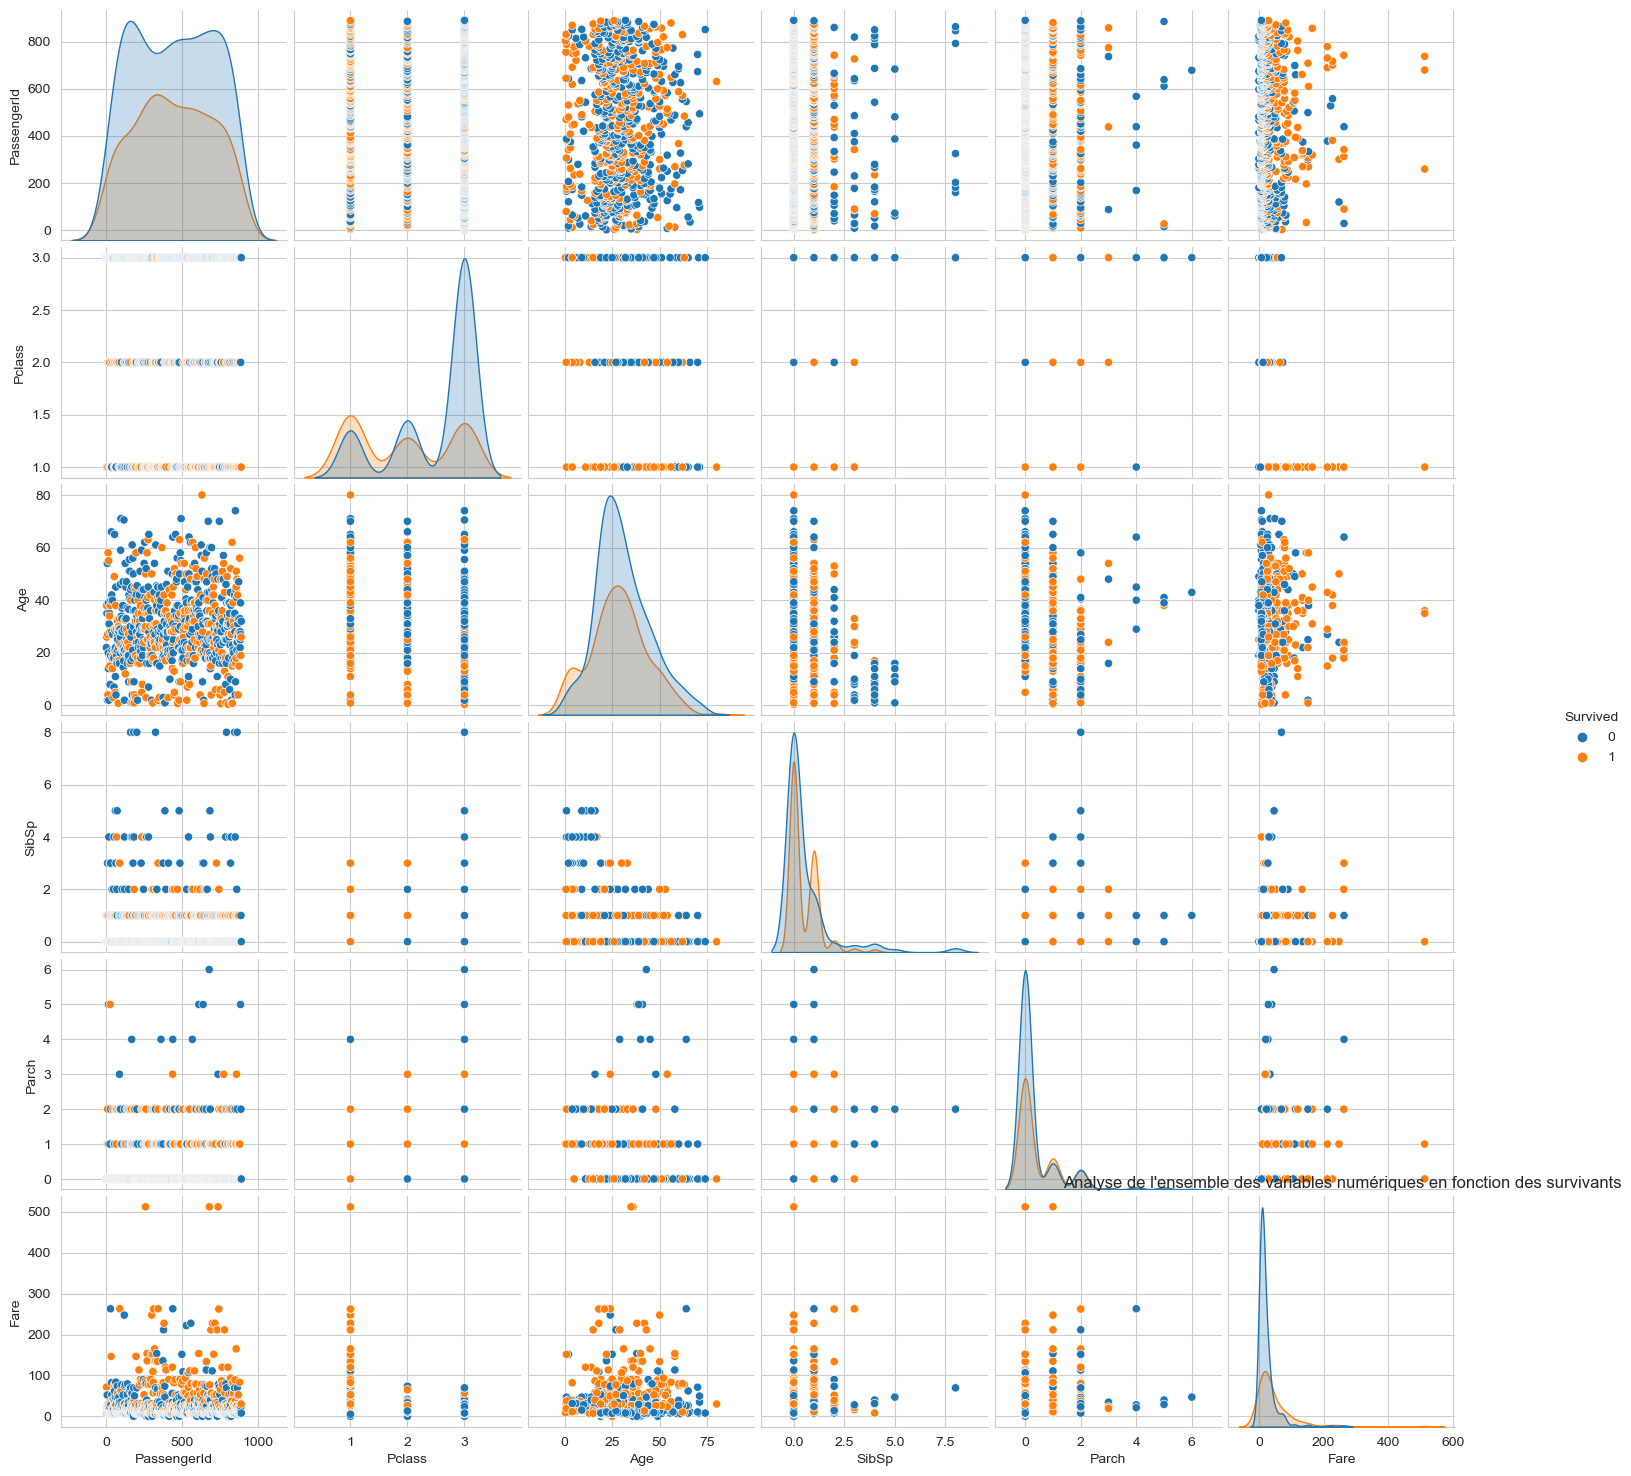

In [27]:
plt.figure(figsize = (15,10))
sns.pairplot(train, hue = 'Survived')
plt.title("Analyse de l'ensemble des variables numériques en fonction des survivants")

###### Test

***** PassengerId *****
Moyenne: 446.0
Variance: 66231.0
Écart-type: 257.3538420152301
Skewness: 0.0
Kurtosis: -1.1999999999999997


<Figure size 800x400 with 0 Axes>

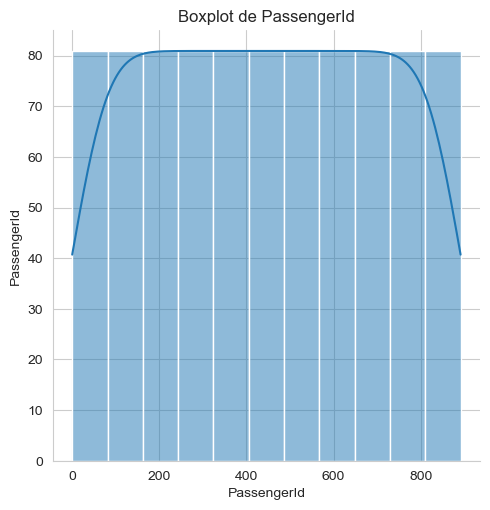

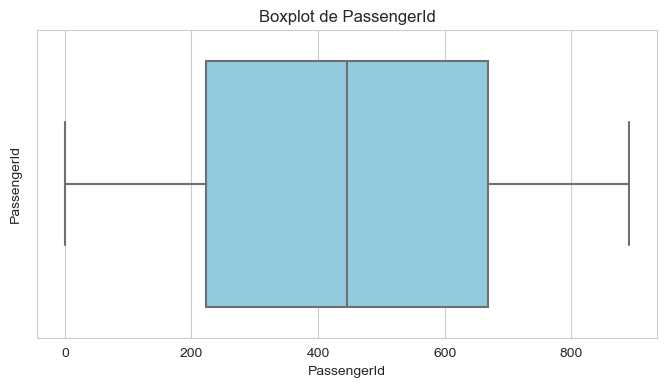



***** Survived *****
Moyenne: 0.3838383838383838
Variance: 0.2367722165474984
Écart-type: 0.4865924542648585
Skewness: 0.4785234382949897
Kurtosis: -1.775004671066304


<Figure size 800x400 with 0 Axes>

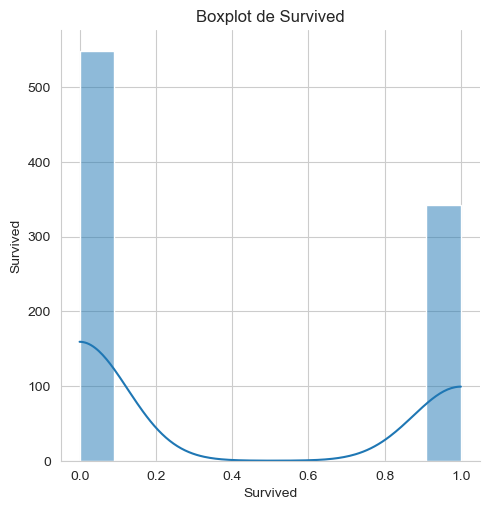

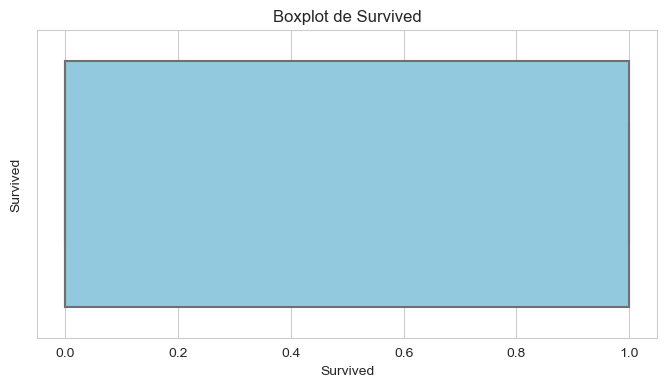



***** Pclass *****
Moyenne: 2.308641975308642
Variance: 0.6990151199889065
Écart-type: 0.8360712409770513
Skewness: -0.6305479068752845
Kurtosis: -1.2800149715782825


<Figure size 800x400 with 0 Axes>

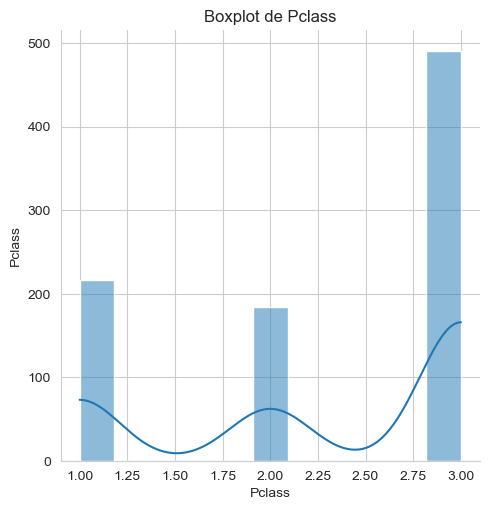

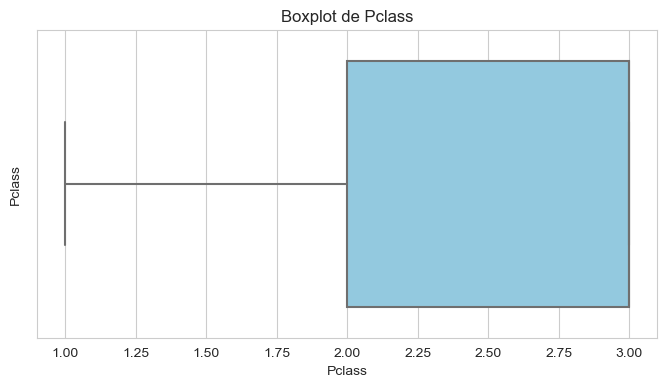



***** Age *****
Moyenne: 29.69911764705882
Variance: 211.0191247463081
Écart-type: 14.526497332334044
Skewness: 0.38910778230082704
Kurtosis: 0.17827415364210353


<Figure size 800x400 with 0 Axes>

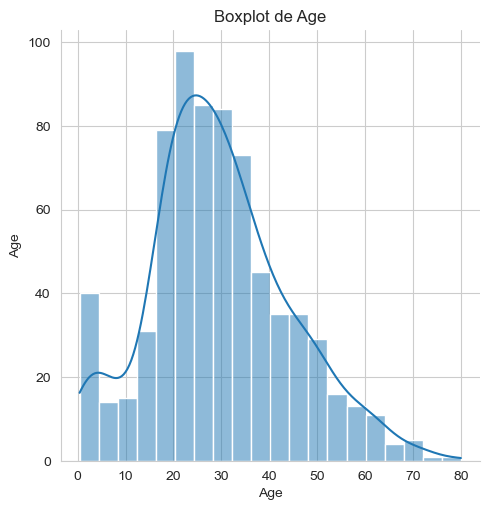

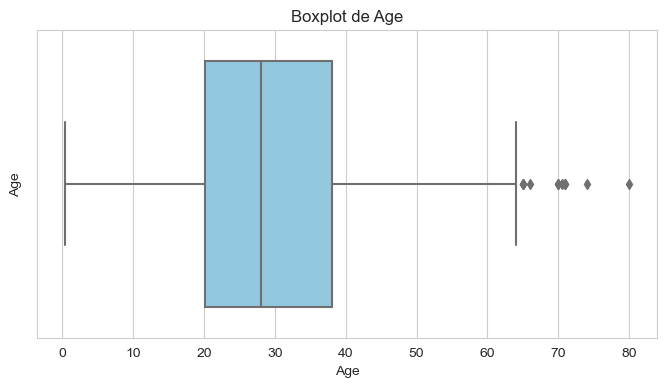



***** SibSp *****
Moyenne: 0.5230078563411896
Variance: 1.2160430774662894
Écart-type: 1.1027434322934275
Skewness: 3.6953517271630565
Kurtosis: 17.880419726645968


<Figure size 800x400 with 0 Axes>

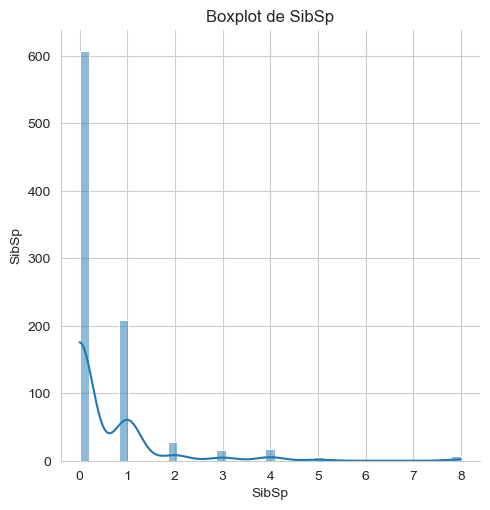

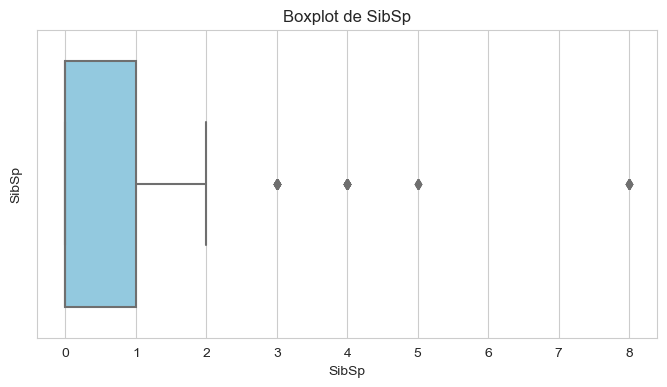



***** Parch *****
Moyenne: 0.38159371492704824
Variance: 0.6497282437357467
Écart-type: 0.8060572211299559
Skewness: 2.7491170471010933
Kurtosis: 9.778125179021648


<Figure size 800x400 with 0 Axes>

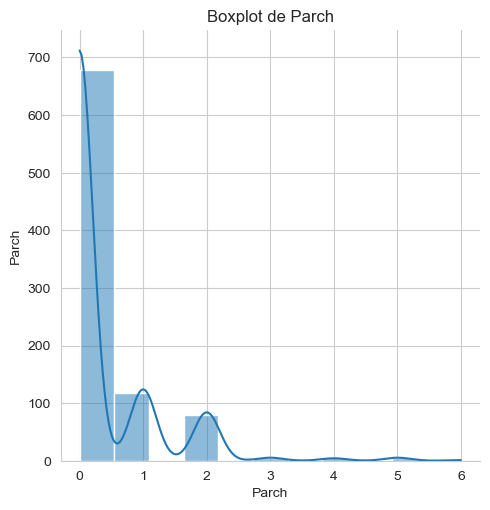

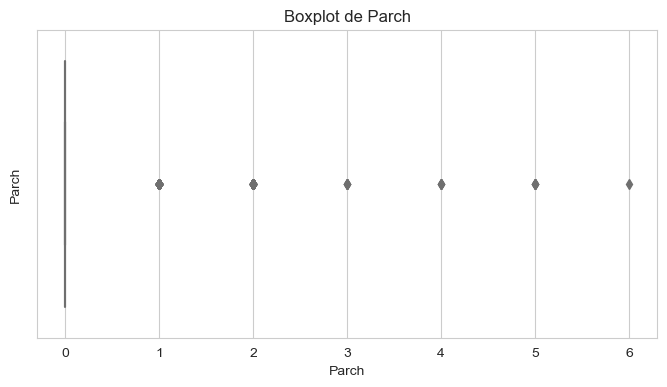



***** Fare *****
Moyenne: 32.204207968574636
Variance: 2469.436845743117
Écart-type: 49.693428597180905
Skewness: 4.787316519674893
Kurtosis: 33.39814088089868


<Figure size 800x400 with 0 Axes>

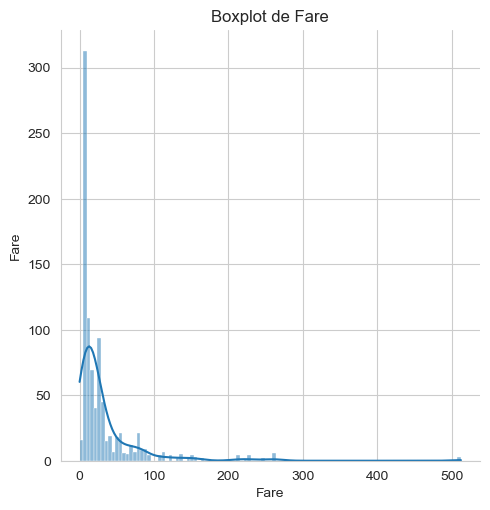

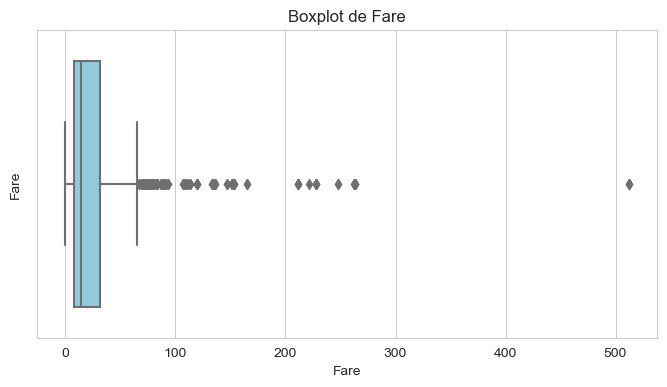

In [28]:
# Sélectionnez les colonnes numériques
numeric_columns = train.select_dtypes(['float64', 'int64'])

# Boucle à travers chaque colonne numérique
for col in numeric_columns.columns:
    # Statistiques de base
    print(f'***** {col} *****')
    print('Moyenne:', numeric_columns[col].mean())
    print('Variance:', numeric_columns[col].var())
    print('Écart-type:', numeric_columns[col].std())
    print('Skewness:', numeric_columns[col].skew())
    print('Kurtosis:', numeric_columns[col].kurtosis())
    
    # Graphique de distribution
    plt.figure(figsize = (8,4))
    sns.displot(x = numeric_columns[col], kde = True)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

    # Graphique de boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_columns[col], orient='vertical', color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

    print('\n')

plt.figure(figsize = (15,10))
sns.pairplot(test, hue = 'Survived')
plt.title("Analyse de l'ensemble des variables numériques en fonction des survivants")

#### B. Corrélation des variables

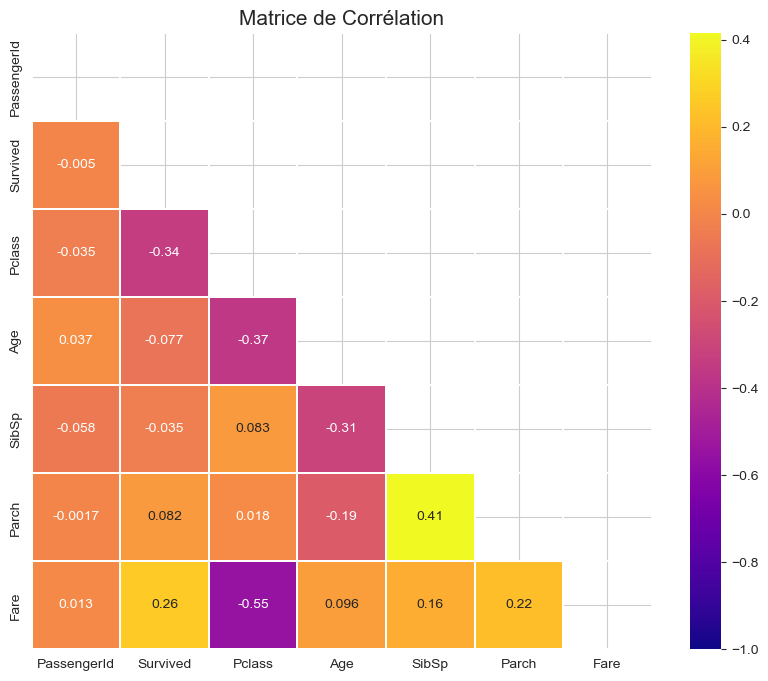

In [29]:
# Graphique de Pearson 

correlation2 = train.corr()

mask = np.zeros_like(correlation2)
mask[np.triu_indices_from(mask)] = True 

plt.figure (figsize = (10,8))
ax = sns.heatmap(correlation2, mask=mask, vmin=-1, cmap='plasma', linewidth = 0.2, annot = True)
plt.title('Matrice de Corrélation', size = 15)
plt.show()

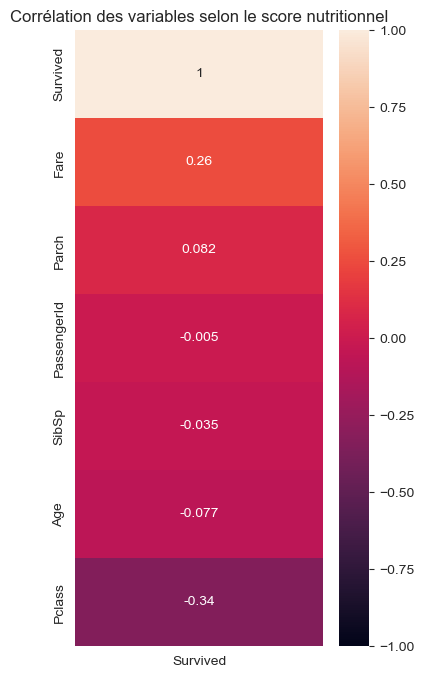

In [30]:
# Analyse corrélation en fonction de Survived

plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(train.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Corrélation des variables selon le score nutritionnel');

## III. Feature Engineering

Dans ce projet, nous vont pu appréhender nos variables. Cela nous a notamment permis d'avoir une connaissance plus approfondie de notre jeu de données.

A présent, nous allons procéder à l'étape du Feature Engineering. Pour cela, nous allons effectuer les démarches suivantes : 

- Labelisation des variables objets
- Imputation des variables manquantes (Age et Embarked pour train et Age et Fare pour test). La variable Cabin sera supprimée.
- Transformation variable avec âge que l'on va modifier en fonction de la tranche d'âge,
- Suppression des variables.

A la fin de cette étape, nos données seront aptes à être utilisées dans une phase de modélisation.

### 1. Labelisation des variables

Dans cette étape, nous allons simplement transformer les catégories objets en numériques.
En effet, une modélisation est impossible sans cette étape car les modèles ne sont soumis qu'au format numérique.

Même si la variable se modifie, cela ne va pas altérer la qualité des variables.

Dans cette étape, nous allons simplement utiliser un système qui va encoder automatiquement les variables Sex et Embarked que nous souhaitons garder.

In [31]:
# Créez un objet LabelEncoder
label_encoder = LabelEncoder()

# Label Encoding pour la variable 'Sex'
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])

# Label Encoding pour la variable 'Embarked'
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,"(13.683, 26.947]","(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,"(26.947, 40.21]","(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,"(13.683, 26.947]","(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,"(26.947, 40.21]","(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,"(26.947, 40.21]","(-0.512, 128.082]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,"(26.947, 40.21]","(-0.512, 128.082]"
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,"(13.683, 26.947]","(-0.512, 128.082]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2,NaN,"(-0.512, 128.082]"
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,"(13.683, 26.947]","(-0.512, 128.082]"


Notre labelisation a parfaitement fonctionné, voici la modification des variables :

Variable Sex : 
- male = 1
- female = 0

Variable Embarked : 
- S = 2
- C = 0
- Q = 1

### 2. Imputation variables manquantes

Dans le cadre d'une imputation, il existe de très nombreuses méthodes pour effectuer cette démarche : 
- fillna en fonction de la moyenne, du mode, ...
- suppression lignes avec valeurs manquantes mais perte d'informations,
- suppression de la colonne,
- imputation avec un Knn, simple ou IterativeImputer.

Dans notre situation, nous allons choisir la solution d'une imputation à l'aide d'un KnnImputer. Ce dernier va tout simplement imputer les variables en se basant sur les données de l'ensemble des autres variables mais aussi en comparant avec les valeurs non manquantes.
La suppression de Cabin est importante, cette variable présente un nombre de valeurs manquantes très importants mais surtout, cette variable a une faible importance dans notre projet à la vue de la connaissance de la classe, du prix payé au ticket, ... .

In [32]:
# Suppression Cabin
train.drop(columns = ['Cabin'], inplace = True)
test.drop(columns = ['Cabin'], inplace = True)

In [33]:
# Imputation pour train

# Sélectionner les colonnes avec des valeurs manquantes
columns_with_missing_values = ['Age', 'Embarked']

# Créer un DataFrame contenant uniquement ces colonnes
data_to_impute = train[columns_with_missing_values]

# Créer un imputeur KNN avec un nombre de voisins (n_neighbors) de votre choix
knn_imputer = KNNImputer(n_neighbors=5)  # Vous pouvez ajuster n_neighbors selon vos préférences

# Utiliser l'imputeur pour remplacer les valeurs manquantes
imputed_data = knn_imputer.fit_transform(data_to_impute)

# Remettre les données imputées dans le DataFrame d'origine
train[columns_with_missing_values] = imputed_data

# Afficher les premières lignes du DataFrame avec les valeurs imputées
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int32   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    float64 
 11  AgeBand      714 non-null    category
 12  FareBand     891 non-null    category
dtypes: category(2), float64(3), int32(1), int64(5), object(2)
memory usage: 75.5+ KB


In [34]:
# Imputation pour test

# Sélectionner les colonnes avec des valeurs manquantes
columns_missing_values = ['Age', 'Fare']

# Créer un DataFrame contenant uniquement ces colonnes
data_impute = test[columns_with_missing_values]

# Créer un imputeur KNN avec un nombre de voisins (n_neighbors) de votre choix
knn_imputer = KNNImputer(n_neighbors=5)  # Vous pouvez ajuster n_neighbors selon vos préférences

# Utiliser l'imputeur pour remplacer les valeurs manquantes
imputed_data = knn_imputer.fit_transform(data_impute)

# Remettre les données imputées dans le DataFrame d'origine
test[columns_missing_values] = imputed_data

# Afficher les premières lignes du DataFrame avec les valeurs imputées
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 29.5+ KB


Notre jeu de données ne présentent plus de valeurs manquantes, nous avons répondu à cette première étape.

### 3. Transformation variables

Dans cette seconde étape, nous allons procéder à une transformation de la variable Age afin de la rendre plus lisible.
En effet, au lieu de traiter tout un ensemble de variables, nous allons regrouper les catégories d'âges par tranche.

#### A. Age

In [35]:
# Fonction pour attribuer les labels en fonction de l'âge
def assign_age_group(age):
    if age <= 16:
        return 0
    elif age <= 40:
        return 1
    elif age <= 60:
        return 2
    else:
        return 3

# Appliquez la fonction pour créer la nouvelle colonne 'AgeGroup'
train['AgeGroup'] = train['Age'].apply(assign_age_group)
test['AgeGroup'] = test['Age'].apply(assign_age_group)

# Vérification résultat
print('Vérification pour train')
print(train['AgeGroup'].value_counts())

print('_______________________________________________________')

print('Vérification pour test')
print(test['AgeGroup'].value_counts())

Vérification pour train
1    641
2    128
0    100
3     22
Name: AgeGroup, dtype: int64
_______________________________________________________
Vérification pour test
1    287
2     86
0     34
3     11
Name: AgeGroup, dtype: int64


#### B. Fare

In [36]:
# Fonction pour attribuer les labels en fonction de Fare
def assign_fare_group(fare):
    if fare <= 10:
        return 0
    elif fare <= 50:
        return 1
    elif fare <= 100:
        return 2
    else:
        return 3

# Appliquez la fonction pour créer la nouvelle colonne 'FareGroup'
train['FareGroup'] = train['Fare'].apply(assign_fare_group)
test['FareGroup'] = test['Fare'].apply(assign_fare_group)

### 4. Suppression colonnes

Cette dernière étape est une suppression des variables que nous ne souhaitons pas garder pour l'étape de modélisation.

In [37]:
train.drop(columns = ['PassengerId', 'Name', 'Age', 'Ticket', 'AgeBand', 'FareBand', 'Fare'], inplace = True)
test.drop(columns = ['PassengerId', 'Name', 'Age', 'Ticket', 'FareGroup'], inplace = True)


# Renommer la variable "FareGroup" en "Fare"
train.rename(columns={'FareGroup': 'Fare'}, inplace=True)

Notre étape du Feature Engineering est à présent terminé.

Nous avons pu répondre à l'ensemble de notre stratégie.

A présent, nous allons démarrer la phase de modélisation.

## IV. Modélisation
### 1. Préparation des données

In [38]:
# Réorganisez les colonnes de test pour correspondre à celles de train
test = test[train.columns[1:]]  # Exclut la colonne 'Survived' de train

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

###### Standardisation des données

1. StandardScaler
Le StandardScaler est une technique de prétraitement couramment utilisée en apprentissage automatique pour mettre à l'échelle les caractéristiques (features) d'un jeu de données. Il vise à transformer les caractéristiques de manière à ce qu'elles aient une moyenne de 0 et un écart-type (variance) de 1. Cela permet de rendre les caractéristiques plus comparables et de réduire l'impact des valeurs aberrantes.

2. MinMaxScaler
MinMaxScaler est une technique de prétraitement des données en apprentissage automatique, utilisée pour mettre à l'échelle les caractéristiques (features) d'un jeu de données dans une plage spécifique, généralement entre 0 et 1. Cette mise à l'échelle garantit que toutes les caractéristiques ont des valeurs comparables et sont normalisées.

In [39]:
# Créer un objet StandardScaler
scaler = StandardScaler()

# Adapter et transformer les données d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer les données de test
X_test = scaler.transform(X_test)

In [40]:
# Créer un objet MinMaxScaler
minmax = MinMaxScaler()

# Adapter et transformer les données d'entraînement
X_scaled = minmax.fit_transform(X_train)

# Transformer les données de test
X_test_scaled = minmax.transform(X_test)

### 2. Modélisation

Dans le cadre de notre modélisation, nous allons tester 4 modèles :
- Régression Logistique,
- SVC,
- RandomForest,
- XgBoost.

Nous allons les entrainer sans modifier les paramètres.
Après visualisation des résultats, nous sélectionnerons le meilleur modèle pour procéder à la phase d'optimisation.

##### Les métriques

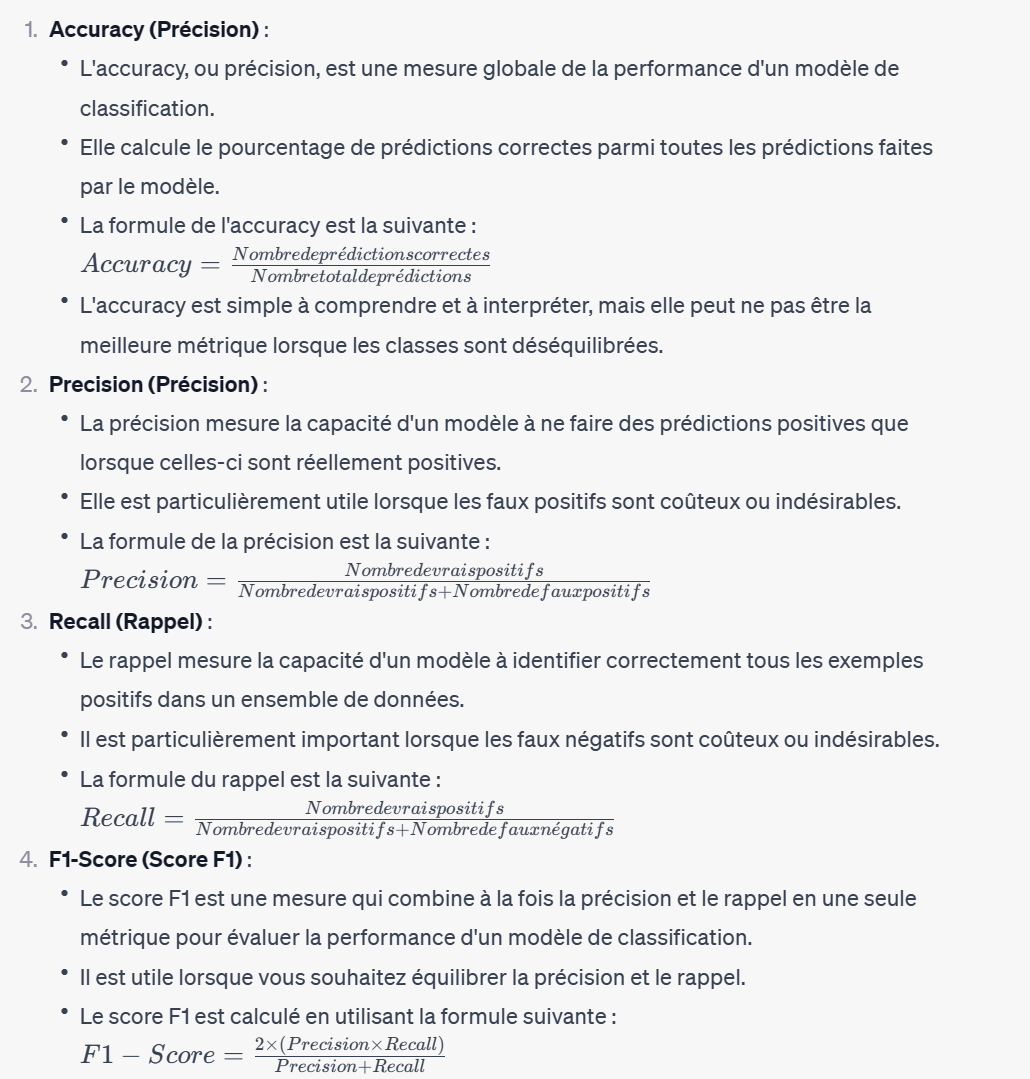

In [41]:
# Création fonction métriques

def evaluate_model_metrics(Y_true, Y_pred):
    # Calculer les métriques
    accuracy = accuracy_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)

    # Afficher les métriques
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

    # Afficher la matrice de confusion
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### A. Régression Logistique

La régression logistique est un algorithme d'apprentissage automatique utilisé principalement pour la classification binaire, c'est-à-dire pour séparer des données en deux catégories distinctes. Elle est particulièrement adaptée lorsque vous devez prédire une variable de sortie binaire (comme "Oui" ou "Non", "Vrai" ou "Faux", "Malade" ou "En bonne santé") en fonction de plusieurs variables d'entrée.

La régression logistique utilise une fonction logistique pour modéliser la probabilité que la variable de sortie appartienne à une classe particulière en fonction des valeurs des variables d'entrée. Cette fonction logistique transforme une combinaison linéaire des variables d'entrée en une valeur comprise entre 0 et 1, ce qui peut être interprété comme une probabilité. Plus précisément, elle modélise la probabilité que la variable de sortie soit égale à 1.

Accuracy: 0.7968574635241302
Recall: 0.7076023391812866
Precision: 0.7492260061919505
F1 Score: 0.7278195488721805


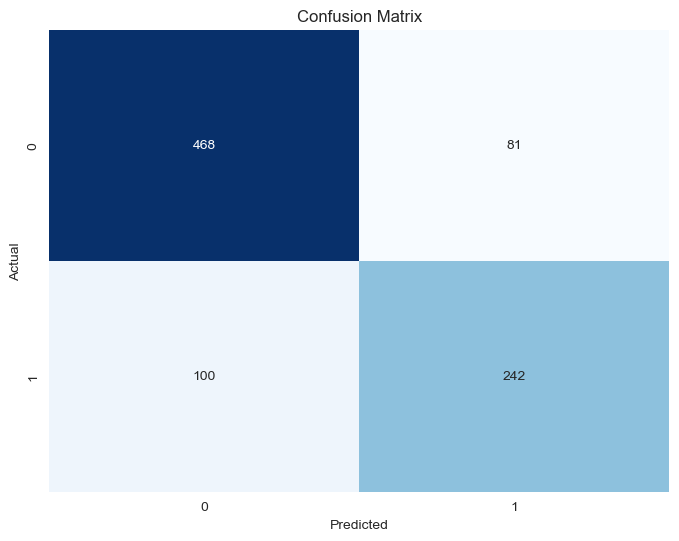

In [42]:
# Avec StandardScaler

# Entraîner le modèle de Régression Logistique
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_train_pred = logistic_regression.predict(X_train)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_train_pred)

Accuracy: 0.6161616161616161
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


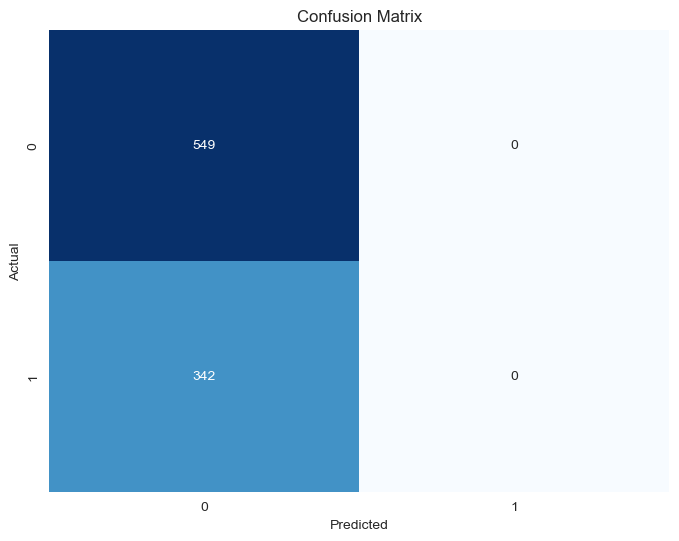

In [43]:
# Avec MinMaxScaler

# Entraîner le modèle de Régression Logistique
logistic_regression_scaled = LogisticRegression()
logistic_regression_scaled.fit(X_scaled, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_pred = logistic_regression.predict(X_scaled)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_pred)

#### B. Support Vector Machine - SVC

Le Support Vector Machine (SVM) est un algorithme d'apprentissage automatique utilisé pour la classification et la régression. Il s'agit principalement d'un outil de classification qui cherche à trouver un hyperplan (une frontière de décision) qui sépare de manière optimale les données en différentes classes. L'objectif est de maximiser la marge, c'est-à-dire la distance entre l'hyperplan et les points de données les plus proches de chaque classe, tout en minimisant les erreurs de classification. Les SVM sont également efficaces pour gérer des données non linéaires en utilisant des noyaux pour projeter les données dans des espaces de dimension supérieure.

Accuracy: 0.8406285072951739
Recall: 0.6871345029239766
Precision: 0.8703703703703703
F1 Score: 0.7679738562091504


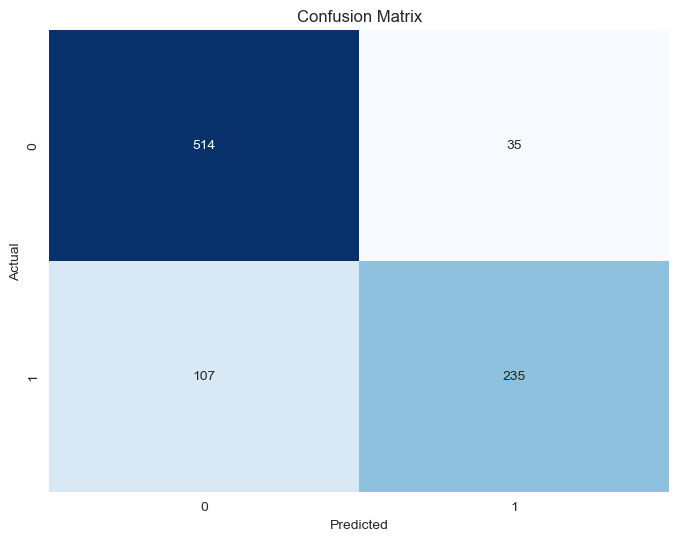

In [44]:
# Avec StandardScaler

# Entraîner le modèle SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_train_pred = svc_model.predict(X_train)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_train_pred)


Accuracy: 0.8148148148148148
Recall: 0.631578947368421
Precision: 0.8470588235294118
F1 Score: 0.7236180904522614


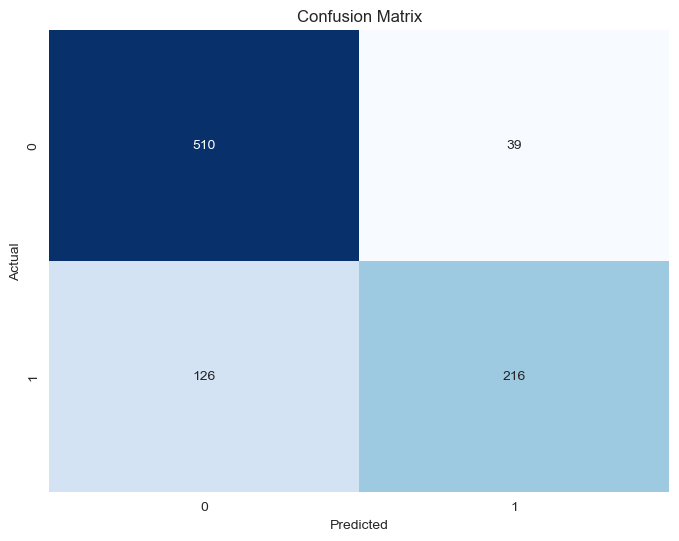

In [45]:
# Avec MinMaxScaler

# Entraîner le modèle SVC
svc_model_scaled = SVC()
svc_model_scaled.fit(X_scaled, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_pred = svc_model_scaled.predict(X_scaled)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_pred)

#### C. Random Forest

Random Forest (Forêt Aléatoire) est un algorithme d'apprentissage automatique basé sur des arbres de décision. Il est utilisé pour des tâches de classification et de régression. Un Random Forest consiste en un ensemble d'arbres de décision, où chaque arbre est construit à partir d'un sous-ensemble aléatoire des données d'entraînement et des caractéristiques. Lors de la prédiction, chaque arbre vote pour la classe majoritaire (dans le cas de la classification) ou prédit une valeur (dans le cas de la régression). En agrégeant les prédictions de plusieurs arbres, Random Forest réduit le surajustement (overfitting) et offre généralement de bonnes performances prédictives.

Accuracy: 0.8754208754208754
Recall: 0.7865497076023392
Precision: 0.8762214983713354
F1 Score: 0.8289676425269645


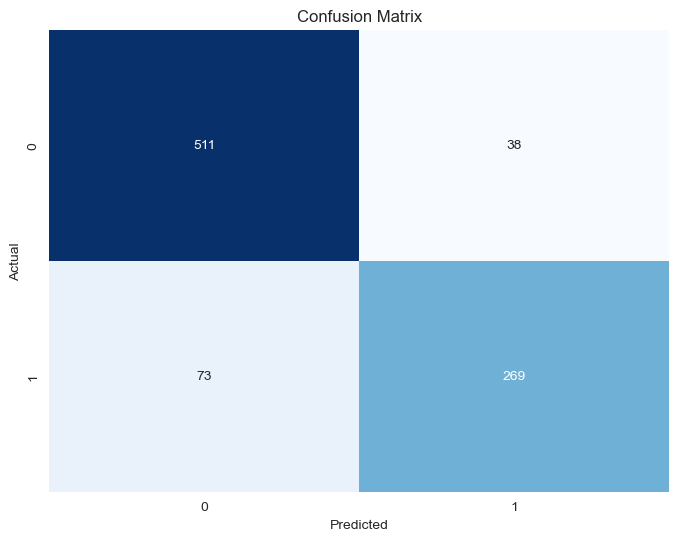

In [46]:
# Entraîner le modèle RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_train_pred = random_forest.predict(X_train)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_train_pred)

Accuracy: 0.8148148148148148
Recall: 0.631578947368421
Precision: 0.8470588235294118
F1 Score: 0.7236180904522614


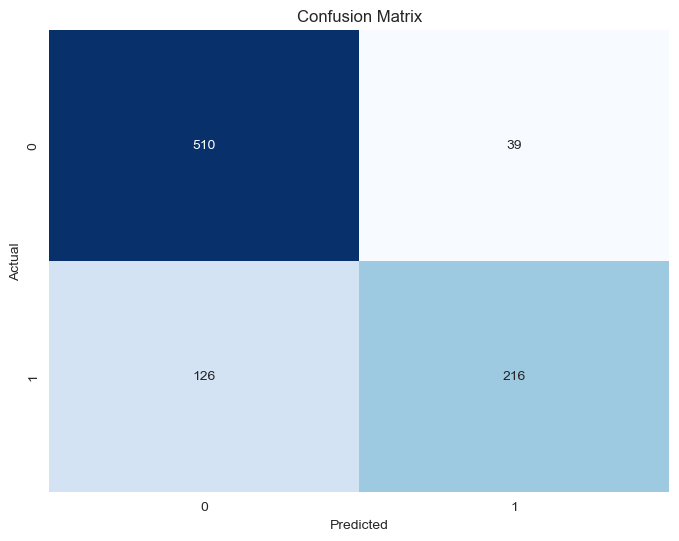

In [47]:
# Avec MinMaxScaler

# Entraîner le modèle RandomForest
random_scaled = SVC()
random_scaled.fit(X_scaled, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_pred = svc_model_scaled.predict(X_scaled)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_pred)

#### D. XGBoost

XGBoost, abréviation de "Extreme Gradient Boosting", est un algorithme d'apprentissage automatique populaire qui appartient à la famille des méthodes d'ensemble. Il est principalement utilisé pour des tâches de classification et de régression. XGBoost combine plusieurs modèles d'arbres de décision faibles pour former un modèle puissant. Il utilise un processus itératif de renforcement (boosting) où les arbres sont construits séquentiellement, en se concentrant sur les erreurs de prédiction des arbres précédents. XGBoost est connu pour sa capacité à gérer efficacement les données de grande dimension, sa tolérance au surajustement et ses performances de pointe dans de nombreuses compétitions de science des données.

Accuracy: 0.8720538720538721
Recall: 0.7777777777777778
Precision: 0.875
F1 Score: 0.823529411764706


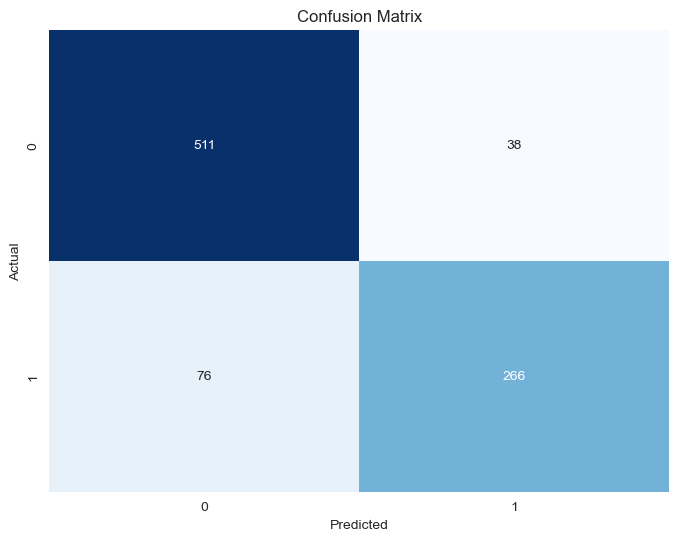

In [48]:
# Entraîner le modèle XGBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_train_pred = xgboost_model.predict(X_train)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_train_pred)


Accuracy: 0.8148148148148148
Recall: 0.631578947368421
Precision: 0.8470588235294118
F1 Score: 0.7236180904522614


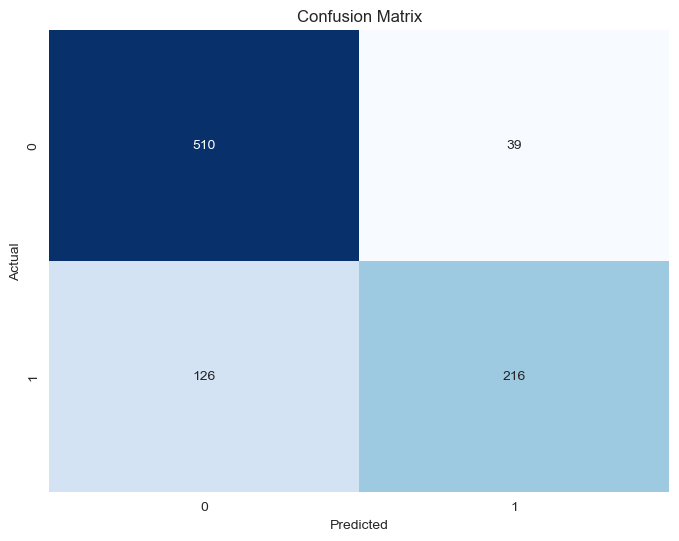

In [49]:
# Avec MinMaxScaler

# Entraîner le modèle XGBoost
boost_scaled = SVC()
boost_scaled.fit(X_scaled, Y_train)

# Prédire les étiquettes sur l'ensemble d'entraînement
Y_pred = svc_model_scaled.predict(X_scaled)

# Utilisez la fonction pour afficher les métriques et la matrice de confusion
evaluate_model_metrics(Y_train, Y_pred)

Dans notre phase de test, nous avons voulu tester la normalisation et la standardisation.
Les résultats obtenus démontrent clairement que le StandardScaler présente de meilleurs résultats.

Parmi les résultats que nous avons obtenu, le XGBoost et le RandomForest présentent les meilleurs résultats avec un accuracy d'environ 0.87, ce qui représente un excellent résultat.

Toutefois, le Random Forest semble présenter un score plus élevé, nous allons donc prendre la décision de conserver ce modèle pour notre tableau de bord.

###### Enregistrement du modèle

In [50]:
import pickle

# Enregistrer le modèle dans un fichier pickle
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

# Conclusion

En conclusion, nous pouvons affirmer avoir répondu à notre problématique.

A travers un ensemble d'étapes, nous avons pu traiter un ensemble d'hypothèses. En effet, la première étape, à savoir l'analyse exploratoire a été effectué en analysant la variable clé de notre jeu de données (Survived). Cette variable nous a apporté un grand nombre d'informations et de mieux comprendre nos données.
Par la suite, nous avons abordé l'ensemble des variables du jeu de données afin de mieux connaître les passagers ayant vécu cette catastrophe et ainsi de mieux analyser notre dataframe.

Ensuite, grâce au Feature Engineering, nous avons optimisé nos données en les transformant de manière judicieuse, améliorant ainsi leur pertinence pour la modélisation. Cette étape cruciale nous a permis de préparer les variables et de les adapter pour les rendre compatibles avec nos modèles.

Enfin, lors de la phase de modélisation, nous avons évalué plusieurs modèles et hypothèses pour résoudre notre problématique. Après des tests rigoureux, le modèle Random Forest a émergé comme le choix optimal pour prédire la survie des passagers du Titanic.